In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [52]:
data= pd.read_csv(r'C:\Users\Akilan\Documents\Python Scripts\Assignment_TITANIC\titanic_filtered.csv')
print(data.head())


   Unnamed: 0  pclass  survived  \
0           0       1         1   
1           1       1         1   
2           2       1         0   
3           3       1         0   
4           4       1         0   

                                              name  gender      age  sibsp  \
0                    Allen, Miss. Elisabeth Walton  female  29.0000      0   
1                   Allison, Master. Hudson Trevor    male   0.9167      1   
2                     Allison, Miss. Helen Loraine  female   2.0000      1   
3             Allison, Mr. Hudson Joshua Creighton    male  30.0000      1   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000      1   

   parch  ticket    fare    cabin embarked boat   body  \
0      0   24160  211.34       B5        S    2    NaN   
1      2  113781  151.55  C22 C26        S   11    NaN   
2      2  113781  151.55  C22 C26        S  NaN    NaN   
3      2  113781  151.55  C22 C26        S  NaN  135.0   
4      2  113781  151.55  C22 

In [53]:
data=data.drop(['Unnamed: 0'],axis=1)

# Analyzing Data


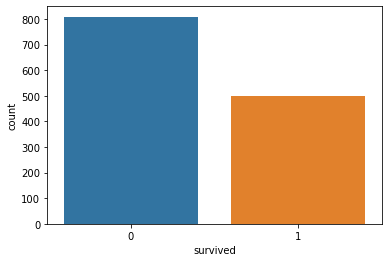

In [54]:
sns.countplot(x="survived",data=data)

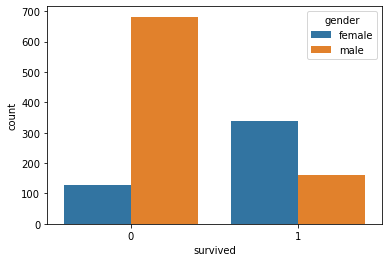

In [9]:
sns.countplot(x="survived",hue="gender",data=data)

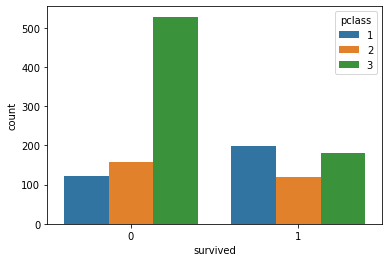

In [10]:
sns.countplot(x="survived",hue="pclass",data=data)

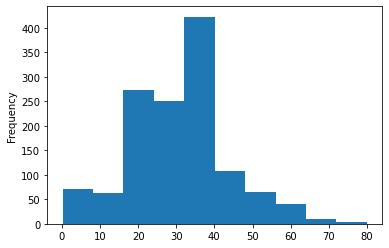

In [11]:
data["age"].plot.hist()

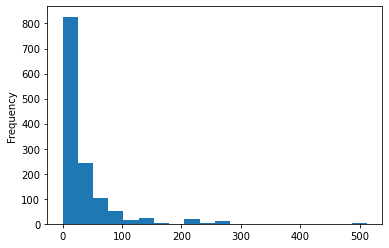

In [12]:
data["fare"].plot.hist(bins=20)

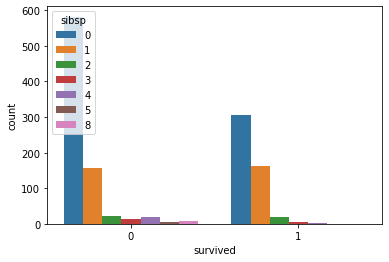

In [13]:
sns.countplot(x="survived",hue="sibsp",data=data)

Data Wrangling

In [58]:
#4. drop a column with more than 25% na
dt=data

In [59]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
dt['gender'] = le.fit_transform(dt['gender'])
dt['embarked'] = le.fit_transform(dt['embarked'])

In [65]:
dt=dt.drop(['cabin','boat','body','home.dest'],axis=1)
dt.head(50)


,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.34,2
1,1,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.55,2
2,1,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.55,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.55,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.55,2
5,1,1,"Anderson, Mr. Harry",1,48.000000,0,0,19952,26.55,2
6,1,1,"Andrews, Miss. Kornelia Theodosia",0,63.000000,1,0,13502,77.96,2
7,1,0,"Andrews, Mr. Thomas Jr",1,39.000000,0,0,112050,0.00,2
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,53.000000,2,0,11769,51.48,2
9,1,0,"Artagaveytia, Mr. Ramon",1,71.000000,0,0,PC 17609,49.50,0


# Feature Selecting

In [66]:

X=dt.drop(['survived','name','ticket'],axis=1)
y=dt[['survived']]

In [67]:
X.shape

(1307, 7)

In [68]:
X.dtypes

pclass        int64
gender        int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

# # Train-Test Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
y_test.shape

(393, 1)

In [70]:
X_train.shape

(914, 7)

In [71]:
y_train.mean()

survived    0.376368
dtype: float64

In [72]:
y_test.mean()

survived    0.391858
dtype: float64

In [73]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

C:\Users\Akilan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [75]:
y_pred=lg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


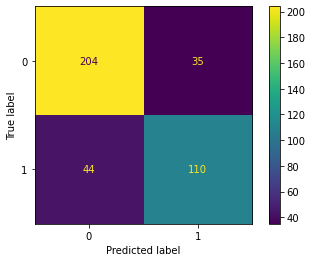

In [77]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
from sklearn.metrics import plot_confusion_matrix
metrics.plot_confusion_matrix(lg,X_test, y_test)

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.7989821882951654
Precision: 0.7586206896551724
Recall: 0.7142857142857143
F1 score: 0.7357859531772576


In [79]:
y_predict=lg.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,

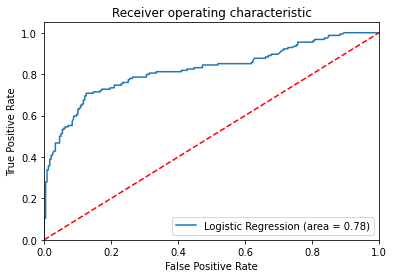

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [85]:
# Gains Chart Code

y_pred_prob = lg.predict_proba(X)[:, 1]
dt['y_pred_P']=pd.DataFrame(y_pred_prob)
dt['P_Rank_RF']=pd.qcut(dt['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=dt.groupby('P_Rank_RF')['survived'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df.head()

,count,mean
P_Rank_RF,,
10,131,0.969466
9,131,0.832061
8,130,0.630769
7,131,0.351145
6,130,0.361538


In [88]:
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile
0,10,131,0.969466,127.0,127.0,0.255020,0.255020,0.100230,0.100230,1
1,9,131,0.832061,109.0,236.0,0.218876,0.473896,0.100230,0.200459,2
2,8,130,0.630769,82.0,318.0,0.164659,0.638554,0.099464,0.299923,3
3,7,131,0.351145,46.0,364.0,0.092369,0.730924,0.100230,0.400153,4
4,6,130,0.361538,47.0,411.0,0.094378,0.825301,0.099464,0.499617,5
5,5,131,0.145038,19.0,430.0,0.038153,0.863454,0.100230,0.599847,6
6,4,131,0.129771,17.0,447.0,0.034137,0.897590,0.100230,0.700077,7
7,3,130,0.153846,20.0,467.0,0.040161,0.937751,0.099464,0.799541,8
8,2,131,0.160305,21.0,488.0,0.042169,0.979920,0.100230,0.899770,9
9,1,131,0.076336,10.0,498.0,0.020080,1.000000,0.100230,1.000000,10


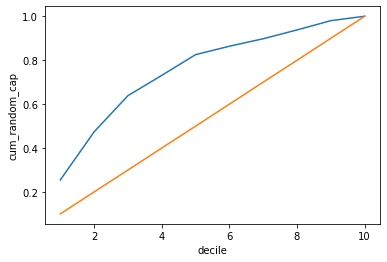

In [89]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)